## EDA And Feature Engineering Flight Price Prediction
### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [112]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [113]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [115]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [116]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [117]:
df['Dep_Time_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Time_Minute']=df['Dep_Time'].str.split(':').str[1]

In [118]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50


In [119]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [120]:
df['Dep_Time_Hour']=df['Dep_Time_Hour'].astype(int)
df['Dep_Time_Minute']=df['Dep_Time_Minute'].astype(int)


In [121]:
df.drop('Date_of_Journey',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Dep_Time_Hour    10683 non-null  int32 
 13  Dep_Time_Minute  10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 959.9+ KB


In [123]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [124]:
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [125]:
df['Arrival_Hours']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_Minute']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [126]:
df['Arrival_Hours']=df['Arrival_Hours'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)

In [127]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [128]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Hours,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Dep_Time_Hour    10683 non-null  int32 
 12  Dep_Time_Minute  10683 non-null  int32 
 13  Arrival_Hours    10683 non-null  int32 
 14  Arrival_Minute   10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [130]:
df.drop('Route',axis=1,inplace=True)

In [131]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Hours,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [132]:
df['Duration_Hour'] = df['Duration'].str.extract(r'(\d+)h', expand=False).fillna(0).astype(int)
df['Duration_Minute'] = df['Duration'].str.extract(r'(\d+)m', expand=False).fillna(0).astype(int)

In [133]:
df.drop('Duration',axis=1,inplace=True)


In [134]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Hours,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Date             10683 non-null  int32 
 7   Month            10683 non-null  int32 
 8   Year             10683 non-null  int32 
 9   Dep_Time_Hour    10683 non-null  int32 
 10  Dep_Time_Minute  10683 non-null  int32 
 11  Arrival_Hours    10683 non-null  int32 
 12  Arrival_Minute   10683 non-null  int32 
 13  Duration_Hour    10683 non-null  int32 
 14  Duration_Minute  10683 non-null  int32 
dtypes: int32(9), int64(1), object(5)
memory usage: 876.5+ KB


In [136]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [137]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [138]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4,np.nan:1})

In [139]:
df['Total_Stops'].isnull().sum()    

0

In [140]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Hours,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,7,25


In [141]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [142]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [143]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

One Hot encoding is used to convert categorical features into numerical features.

In [144]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [145]:
encoder=OneHotEncoder()

In [146]:
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [147]:
df_new=pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

In [148]:
df=pd.concat([df,df_new],axis=1)

In [149]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [150]:
df.head(2)

,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Hours,Arrival_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,No info,3897,24,3,2019,22,20,1,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,No info,7662,1,5,2019,5,50,13,15,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [151]:
df.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month', 'Year',
       'Dep_Time_Hour', 'Dep_Time_Minute', 'Arrival_Hours', 'Arrival_Minute',
       'Duration_Hour', 'Duration_Minute', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10683 non-null  int64  
 1   Additional_Info                            10683 non-null  object 
 2   Price                                      10683 non-null  int64  
 3   Date                                       10683 non-null  int32  
 4   Month                                      10683 non-null  int32  
 5   Year                                       10683 non-null  int32  
 6   Dep_Time_Hour                              10683 non-null  int32  
 7   Dep_Time_Minute                            10683 non-null  int32  
 8   Arrival_Hours                              10683 non-null  int32  
 9   Arrival_Minute                             10683 non-null  int32  
 10  Duration_Hour         

In [153]:
df[[ 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]=df[[ 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']].astype(int)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Total_Stops                                10683 non-null  int64 
 1   Additional_Info                            10683 non-null  object
 2   Price                                      10683 non-null  int64 
 3   Date                                       10683 non-null  int32 
 4   Month                                      10683 non-null  int32 
 5   Year                                       10683 non-null  int32 
 6   Dep_Time_Hour                              10683 non-null  int32 
 7   Dep_Time_Minute                            10683 non-null  int32 
 8   Arrival_Hours                              10683 non-null  int32 
 9   Arrival_Minute                             10683 non-null  int32 
 10  Duration_Hour                     

In [155]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [156]:
df.drop('Additional_Info',axis=1,inplace=True)

In [157]:
df.head(2)

,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Hours,Arrival_Minute,Duration_Hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,1,0,1,0,0,0,0,0


## Cleaned csv file is used for EDA and Feature Engineering

In [158]:
df.to_csv('flight_price.csv',index=False)

In [159]:
df=pd.read_csv('flight_price.csv')

In [160]:
df.head()

,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Hours,Arrival_Minute,Duration_Hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10683 non-null  int64
 1   Price                                      10683 non-null  int64
 2   Date                                       10683 non-null  int64
 3   Month                                      10683 non-null  int64
 4   Year                                       10683 non-null  int64
 5   Dep_Time_Hour                              10683 non-null  int64
 6   Dep_Time_Minute                            10683 non-null  int64
 7   Arrival_Hours                              10683 non-null  int64
 8   Arrival_Minute                             10683 non-null  int64
 9   Duration_Hour                              10683 non-null  int64
 10  Duration_Minute                            106

### Exploratory Data Analysis

In [162]:
df.describe()


,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Hours,Arrival_Minute,Duration_Hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,...,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246092,...,0.035664,0.424693,0.268745,0.065244,0.268745,0.424693,0.118412,0.065244,0.035664,0.087241
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.495414,...,0.185460,0.494320,0.443328,0.246967,0.443328,0.494320,0.323111,0.246967,0.185460,0.282202
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
df.corr()

,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Hours,Arrival_Minute,Duration_Hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603883,-0.009472,0.054389,NaN,-0.061490,-0.002591,0.038123,-0.106939,0.739872,...,-0.234761,0.490166,0.032745,-0.260757,0.032745,0.490166,-0.447394,-0.260757,-0.234761,-0.015310
Price,0.603883,1.000000,-0.153738,-0.103651,NaN,0.006819,-0.024492,0.024264,-0.086155,0.508672,...,-0.179216,0.270619,0.009377,-0.230745,0.009377,0.270619,-0.313401,-0.230745,-0.179216,0.189785
Date,-0.009472,-0.153738,1.000000,-0.038378,NaN,0.002220,-0.008261,-0.003192,-0.017511,-0.022181,...,0.006626,0.099981,-0.060505,-0.014008,-0.060505,0.099981,0.002662,-0.014008,0.006626,-0.075225
Month,0.054389,-0.103651,-0.038378,1.000000,NaN,0.039112,-0.059238,-0.003941,-0.100626,0.016175,...,0.005646,0.139240,0.087161,-0.039358,0.087161,0.139240,0.090480,-0.039358,0.005646,-0.453689
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time_Hour,-0.061490,0.006819,0.002220,0.039112,NaN,1.000000,-0.024806,0.005215,0.067909,0.002783,...,-0.014835,-0.118836,0.155500,-0.017277,0.155500,-0.118836,0.009489,-0.017277,-0.014835,-0.022120
Dep_Time_Minute,-0.002591,-0.024492,-0.008261,-0.059238,NaN,-0.024806,1.000000,0.043054,-0.017594,-0.021946,...,0.067086,-0.085405,-0.024298,0.037675,-0.024298,-0.085405,0.003162,0.037675,0.067086,0.107091
Arrival_Hours,0.038123,0.024264,-0.003192,-0.003941,NaN,0.005215,0.043054,1.000000,-0.154362,0.055180,...,-0.014783,-0.006859,0.054727,-0.033495,0.054727,-0.006859,-0.030844,-0.033495,-0.014783,0.000384
Arrival_Minute,-0.106939,-0.086155,-0.017511,-0.100626,NaN,0.067909,-0.017594,-0.154362,1.000000,-0.074439,...,-0.030493,-0.209867,0.118570,0.081196,0.118570,-0.209867,0.095249,0.081196,-0.030493,0.021270
Duration_Hour,0.739872,0.508672,-0.022181,0.016175,NaN,0.002783,-0.021946,0.055180,-0.074439,1.000000,...,-0.186675,0.299931,0.123424,-0.233338,0.123424,0.299931,-0.346205,-0.233338,-0.186675,0.004008


<Figure size 1800x1200 with 0 Axes>

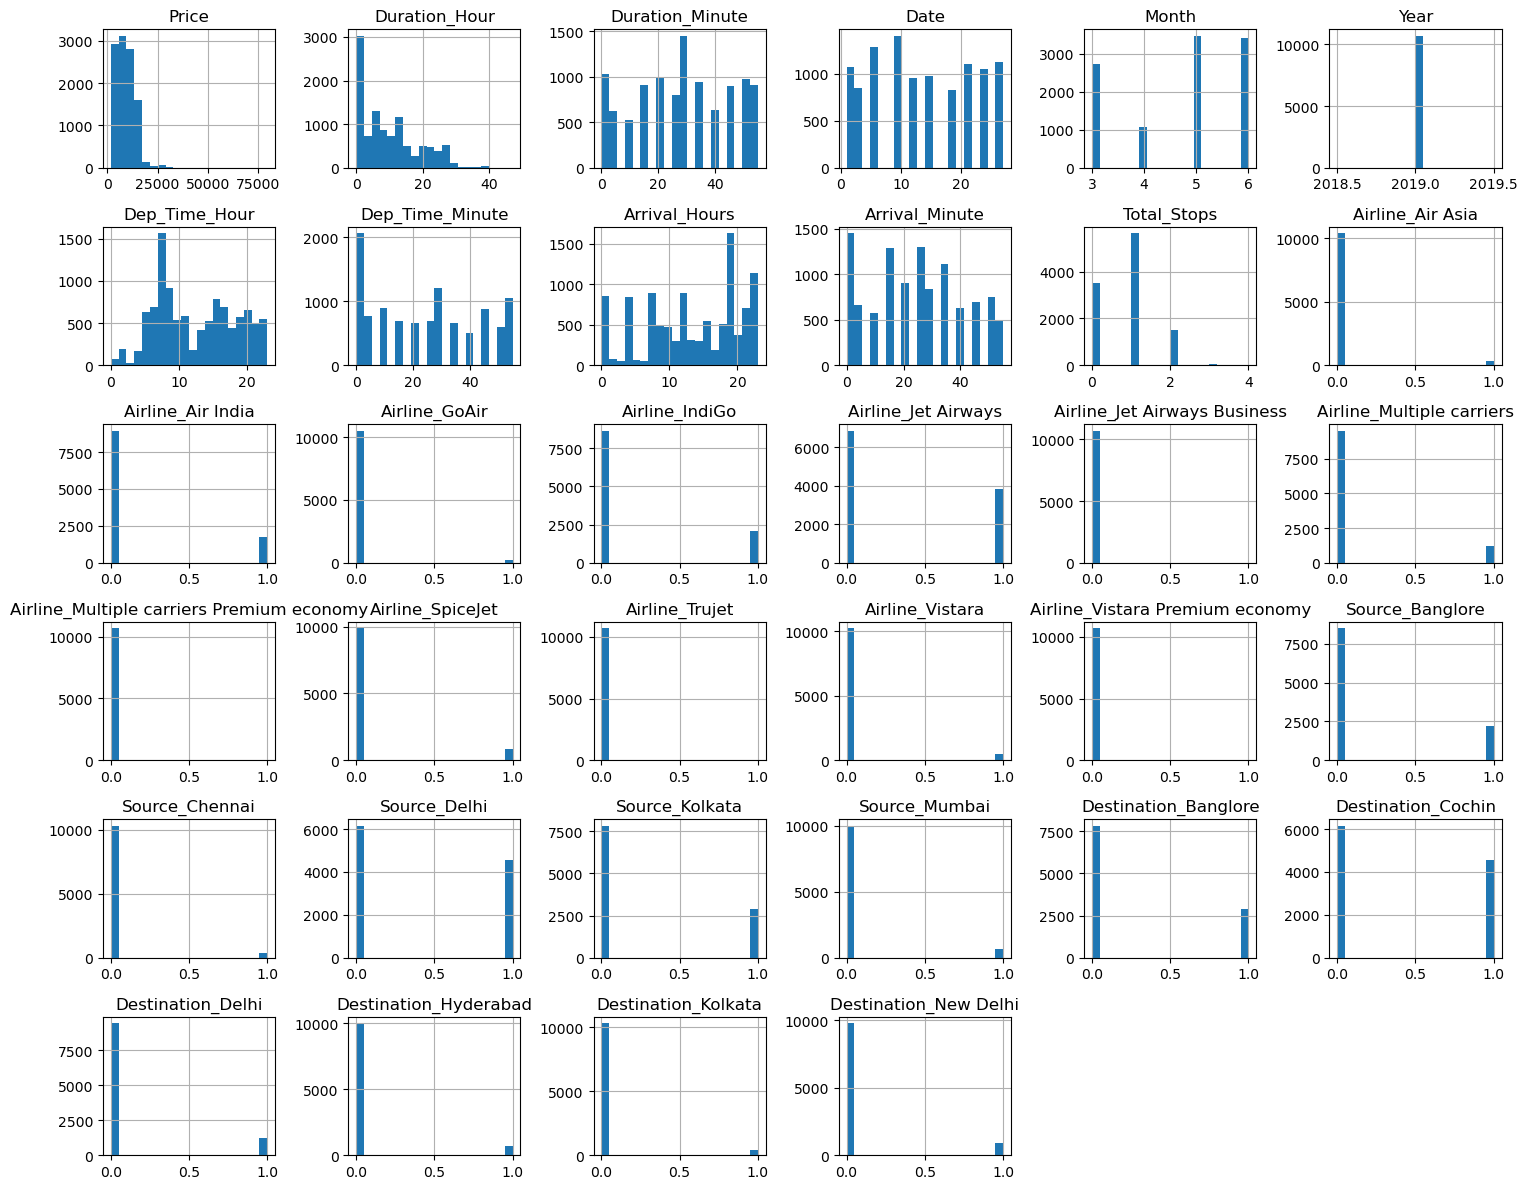

In [163]:
# Histograms for numeric features
numeric_features = ['Price', 'Duration_Hour', 'Duration_Minute', 'Date', 'Month', 'Year', 'Dep_Time_Hour',
                    'Dep_Time_Minute', 'Arrival_Hours', 'Arrival_Minute', 'Total_Stops',
                    'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
                    'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers',
                    'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet',
                    'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore', 'Source_Chennai',
                    'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
                    'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi']
plt.figure(figsize=(18, 12))
df[numeric_features].hist(bins=20, figsize=(15, 12))
plt.tight_layout()
plt.show()